# Исследование рынка заведений общественного питания Москвы

## Содержание
1. [Описание проекта](#step1)
2. [Предобработка данных](#step2)  
3. [Анализ данных и построение графиков](#step3)  
3.1. [Исследование соотношения видов объектов общественного питания по количеству](#step31)  
3.2. [Cоотношение сетевых и несетевых заведений по количеству](#step32)  
3.3. [Сравнение доли сетевых и несетевых заведений по видам](#step33)  
3.4. [Исследование взаимосвязи числа посадочных мест и сетевого 
распространения](#step34)  
3.5. [Среднее количество посадочных мест для разных видов объектов общественного питания](#step35)  
3.6. [Топ-10 улиц Москвы по количеству объектов общественного питания](#step36)  
3.7. [Улицы с одним объектом общественного питания](#step37)  
3.8. [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#step38)
4. [Общий вывод](#step4)

## 1. Описание проекта

**Задача:** исследовать рынок и подготовить презентацию для инвесторов с целью получения средств на открытие заведения общественного питания с роботами-официантами в г.Москве.  

**Данные:**   
Таблица `rest_data`:  
`id` — идентификатор объекта;  
`object_name` — название объекта общественного питания;  
`chain` — сетевой ресторан;  
`object_type` — тип объекта общественного питания;  
`address` — адрес;  
`number`— количество посадочных мест.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

In [2]:
mpl.rcParams['figure.figsize'] = (12,6)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
import warnings
warnings.simplefilter('ignore')

In [3]:
plt.style.use('seaborn-notebook')

In [4]:
 data = pd.read_csv('datasets/rest_data.csv')

<a id='step2'></a>
## 2. Предобработка данных 

In [5]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [8]:
data.duplicated().sum()

0

**Выводы по предобработке:**
* Доступны данные о 15366 объектах;  
* Пропусков в данных нет;  
* Дубликатов не обнаружено;  
* Типы переменных соответствуют их содержанию.  

<a id='step3'></a>
## 3. Анализ данных и построение графиков  

<a id='step31'></a>
**3.1. Исследование соотношения видов объектов общественного питания по количеству**

In [9]:
grouped_by_type = data.groupby('object_type', as_index=False).agg(
    {'id':'count'}).sort_values('id')
grouped_by_type = grouped_by_type.rename(columns={'id':'count'})
grouped_by_type.sort_values('count', ascending=False).head()

,object_type,count
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856


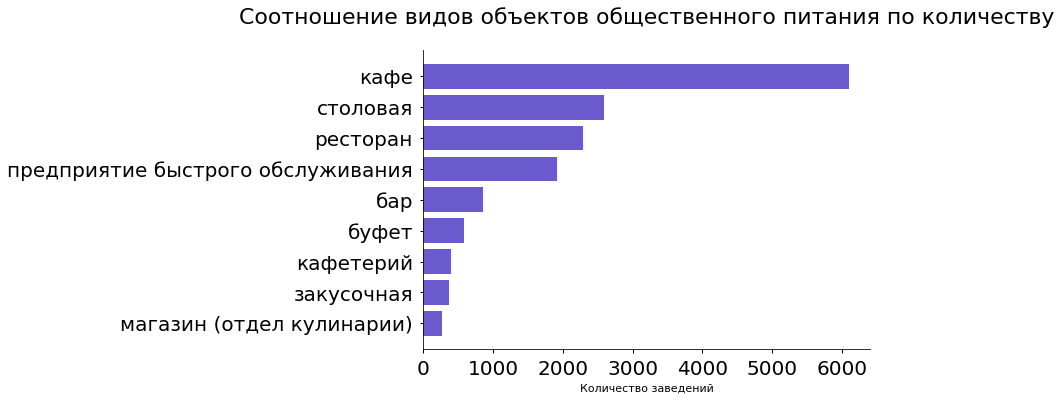

In [10]:
plt.barh(grouped_by_type['object_type'], grouped_by_type['count'],
              color='slateblue')
plt.tick_params(labelsize=20)
plt.title('Cоотношение видов объектов общественного питания по количеству', 
         size=22)
plt.xlabel('Количество заведений')
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.07]);

Мы хотим открыть кафе. Как видно на графике, это самый распространенный объект общественного питания. Конкуренция будет высокой, поэтому важно найти выгодное геграфическое положение.  

<a id='step32'></a>
**3.2. Сотношение сетевых и несетевых заведений по количеству**

In [11]:
grouped_by_chain = data.groupby('chain', as_index=False).agg({
    'id':'count'
})
grouped_by_chain['ratio'] = grouped_by_chain['id']/grouped_by_chain['id'].sum()

In [12]:
grouped_by_chain

,chain,id,ratio
0,да,2968,0.193154
1,нет,12398,0.806846


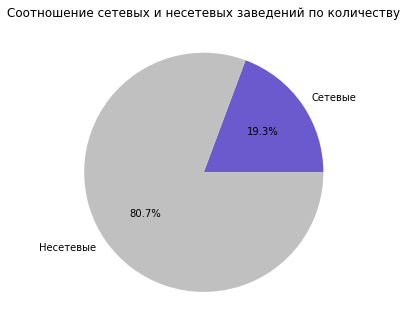

In [13]:
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.pie(x=grouped_by_chain['ratio'], labels = ['Сетевые', 'Несетевые'],
       colors=['slateblue', 'silver'], autopct='%1.1f%%');

Большинство заведений общественного питания - несетевые. 

<a id='step33'></a>
**3.3. Сравнение доли сетевых и несетевых заведений по видам**

In [14]:
chain_grouped_by_type = data[data['chain']=='да'].groupby(
    'object_type', as_index=False).agg({'id':'count'})
chain_grouped_by_type

,object_type,id
0,бар,37
1,буфет,11
2,закусочная,56
3,кафе,1396
4,кафетерий,52
5,магазин (отдел кулинарии),78
6,предприятие быстрого обслуживания,791
7,ресторан,544
8,столовая,3


In [15]:
chain_grouped_by_type = grouped_by_type.merge(
    chain_grouped_by_type, on='object_type')
chain_grouped_by_type = chain_grouped_by_type.rename(columns={
    'id':'chain_count'})

In [16]:
chain_grouped_by_type['chain_share'] = (chain_grouped_by_type['chain_count']/\
chain_grouped_by_type['count'])*100
chain_grouped_by_type = chain_grouped_by_type.sort_values(
'chain_share', ascending=False)
chain_grouped_by_type

,object_type,count,chain_count,chain_share
5,предприятие быстрого обслуживания,1923,791,41.133645
0,магазин (отдел кулинарии),273,78,28.571429
6,ресторан,2285,544,23.807440
8,кафе,6099,1396,22.888998
1,закусочная,360,56,15.555556
2,кафетерий,398,52,13.065327
4,бар,856,37,4.322430
3,буфет,585,11,1.880342
7,столовая,2587,3,0.115964


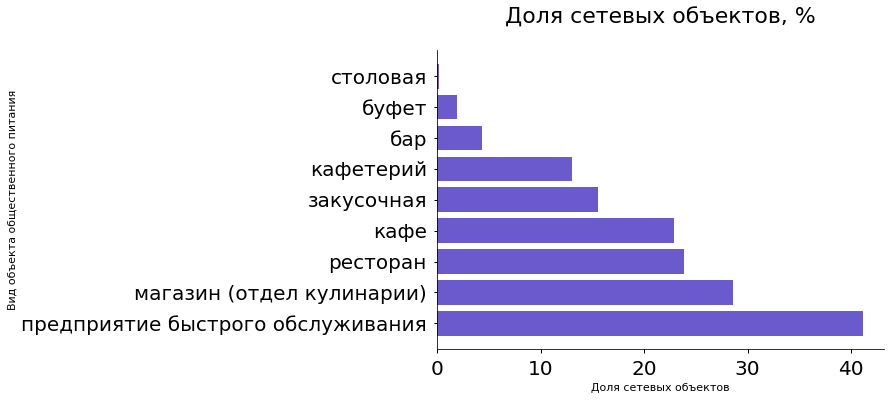

In [17]:
plt.barh(chain_grouped_by_type['object_type'], chain_grouped_by_type[
    'chain_share'], color='slateblue')
plt.tick_params(labelsize=20)
plt.title('Доля сетевых объектов, %', size=22)
plt.xlabel('Доля сетевых объектов')
plt.ylabel('Вид объекта общественного питания')
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.07]);

Сетевое распространение характерно прежде всего для предприятий быстрого обслуживания, отделов кулинарии в магазинах и ресторанов и совсем не характерно для столовых. Что касается кафе, сетевыми являются около четверти из них.    

<a id='step34'></a>
**3.4. Исследование взаимосвязи числа посадочных мест и сетевого распространения**

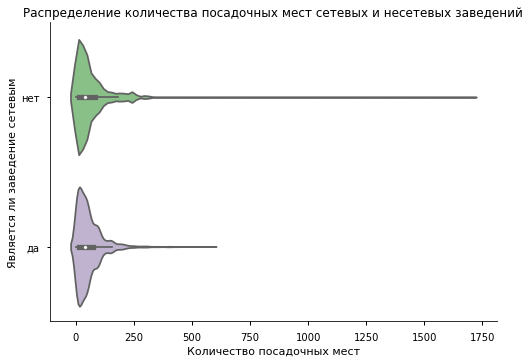

In [18]:
plt.plot()
plt.title('Распределение количества посадочных мест \
сетевых и несетевых заведений')
sns.violinplot(x='number', y='chain', data=data, palette='Accent')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Является ли заведение сетевым');

По графикам видно, что типичные значения количества посадочных мест различаются не сильно, но для несетевых заведений распределение имеет более тяжелый правых хвост.

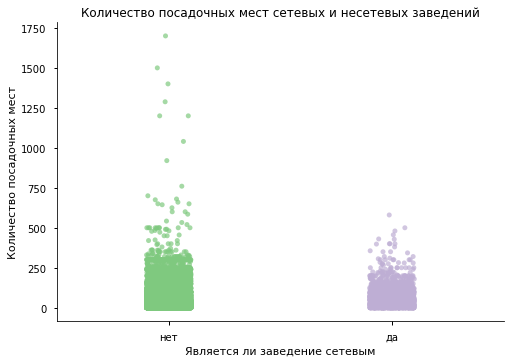

In [19]:
plt.plot()
plt.title('Количество посадочных мест сетевых и несетевых заведений')
sns.stripplot(x='chain', y='number', data=data, palette='Accent', alpha=0.7)
plt.xlabel('Является ли заведение сетевым')
plt.ylabel('Количество посадочных мест');

В целом для сетевых заведений характерно меньшее количество посадочных мест.

<a id='step35'></a>
**3.5. Среднее количество посадочных мест для разных видов объектов общественного питания**

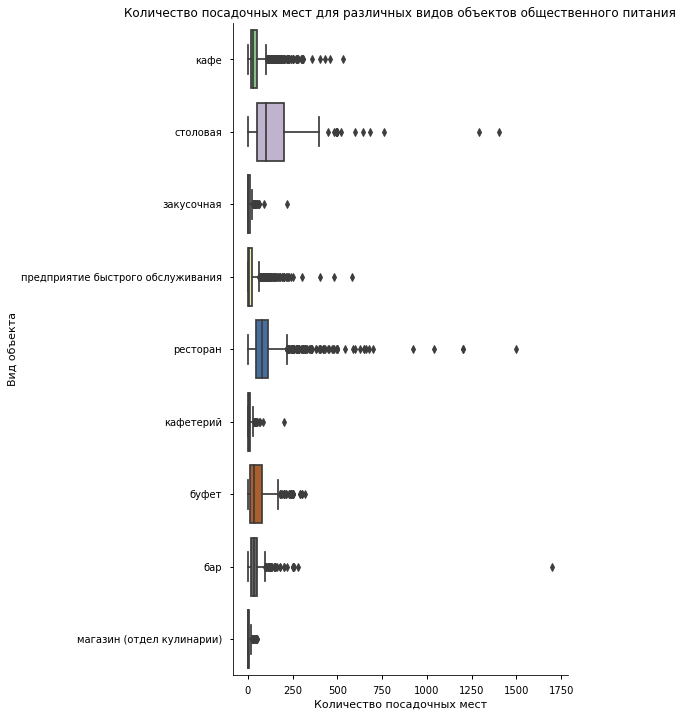

In [20]:
plt.figure(figsize=(6,12))
sns.boxplot(x='number', y='object_type', data=data, palette='Accent')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Вид объекта')
plt.title('Количество посадочных мест для различных видов \
объектов общественного питания');

Среди всех объектов выделяются столовые и рестораны. Для закусочных, кафетериев и отделов кулинарии магазинах характерно скорее отсутствие посадочных мест.  
Для презентации график с коробчатыми диаграммами выглядит слишком сложным, поэтому будем использовать таблицу, где наибольшие значения будут выделены цветом.  
Поскольку распределения количества посадочных мест сильно скошены вправо, в качестве средних значений используем медианы.

In [21]:
median_numbers = data.groupby('object_type', as_index=False).agg({
    'number':'median'})
median_numbers = median_numbers.rename(columns={
    'object_type':'Вид объекта',
    'number':'Медианное количество посадочных мест'})
cm = sns.light_palette("slateblue", as_cmap=True)
display(median_numbers.style.background_gradient(cmap=cm))

,Вид объекта,Медианное количество посадочных мест
0,бар,35
1,буфет,32
2,закусочная,0
3,кафе,30
4,кафетерий,6
5,магазин (отдел кулинарии),0
6,предприятие быстрого обслуживания,5
7,ресторан,80
8,столовая,103


Самое большое количество посадочных мест предоставляют столовые и рестораны.

<a id='step36'></a>
**3.6. Топ-10 улиц Москвы по количеству объектов общественного питания**

Выделим в отдельный столбец информацию об улице из столбца address .

In [22]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [23]:
# типы улиц Москвы (изначальный источник - http://mosopen.ru/streets,
# затем список дополнялся исходя из оставшихся неопределенными улиц)
pattern = re.compile('улица|аллея|бульвар|квартал|линия|микрорайон\
|мост|набережная|парк|переулок|площадь|проезд|проектируемый проезд|\
просека|просек|проспект|тупик|шоссе|километр|территория')

In [24]:
def get_street(row):
    address = row['address']
    address_lst = address.split(',')
    for i in range(len(address_lst)):
        if pattern.search(address_lst[i]):
            return address_lst[i].strip()
    return 'улица не указана'

In [25]:
data['street'] = data.apply(get_street, axis=1)

In [26]:
data[data['street']=='улица не указана'].shape

(250, 7)

In [27]:
data[data['street']=='улица не указана'].head()

,id,object_name,chain,object_type,address,number,street
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,улица не указана
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,улица не указана
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,улица не указана
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,улица не указана
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,улица не указана


Осталось 250 объектов общественного питания, для которых не указана улица. Просмотрев эти данные, можно убедиться, что все эти объекты относятся к Зеленограду, либо к неким деревням и поселениям. Так как мы не собираемся открывать кафе так далеко от центра, для дальнейшего анализа эти строки отфильтруем.  

Топ-10 улиц по количеству объектов общественного питания:

In [28]:
top10_streets = data[data['street']!='улица не указана'].groupby('street').agg(
    {'id':'count'}).sort_values(
    'id', ascending=False).head(10)
top10_streets.columns = ['count']
top10_streets

,count
street,
проспект Мира,204
Профсоюзная улица,183
Ленинградский проспект,173
Пресненская набережная,167
Варшавское шоссе,165
Ленинский проспект,148
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


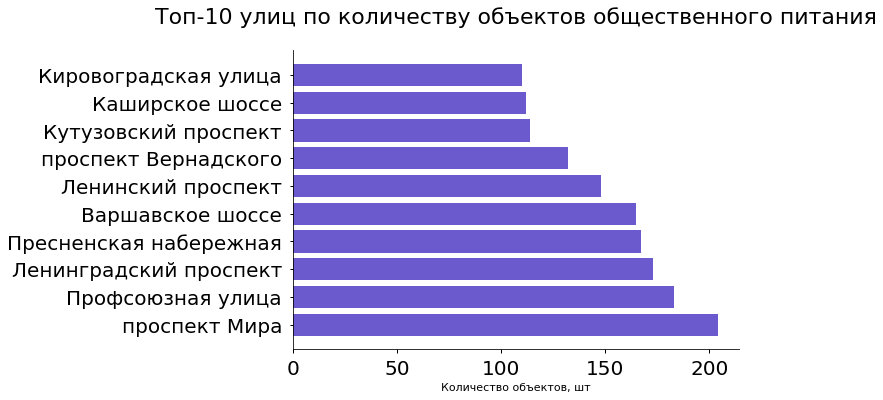

In [29]:
# построим график
plt.barh(top10_streets.index, top10_streets['count'],
         color='slateblue')
plt.xlabel('Количество объектов, шт')
plt.tick_params(labelsize=20)
plt.title('Топ-10 улиц по количеству объектов общественного питания', size=22)

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.07]);

Изучив карту и воспользовавшись информацией о районах Москвы, можно сделать вывод, что в основном это улицы большой протяженности, каждая из которых относится к нескольким районам:  
* проспект Мира: Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово, Ярославский;
* Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки и Ясенево;
* Ленинградский проспект: Аэропорт, Беговой, Сокол и Хорошёвский;
* Пресненская набережная: Пресненский район;
* Варшавское шоссе: Северное Бутово, Южное Бутово, Донской, Нагатино-Садовники, Нагорный, Северное Чертаново, Центральное Чертаново, Южное Чертаново;
* Ленинский проспект: Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино, Якиманка;
* проспект Вернадского: Гагаринский, Ломоносовский, Проспект Вернадского, Раменки, Тропарёво-Никулино;
* Кутузовский проспект: Дорогомилово, Фили-Давыдково;
* Каширское шоссе: Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово, Южное Орехово-Борисово;
* Кировоградская улица: Северное Чертаново, Центральное Чертаново, Южное Чертаново.  

В случае с Пресненской набережной, много заведений находятся в торговых и бизнес-центрах.


In [30]:
# башня "Империя", например: 25 объектов
data[data['address']=='город Москва, Пресненская набережная, дом 12'].shape

(25, 7)

In [31]:
# "башня на набережной": 17 объектов
data[data['address']=='город Москва, Пресненская набережная, дом 10'].shape

(17, 7)

<a id='step37'></a>
**3.7. Улицы с одним объектом общественного питания**

In [32]:
grouped_by_streets = data[data['street']!='улица не указана'].groupby(
    'street', as_index=False).agg({'id':'count'})
streets_with_1_object = grouped_by_streets[grouped_by_streets['id']==1]

In [33]:
streets_with_1_object.shape

(571, 2)

Всего таких улиц 571. Определим, в каких районах Москвы они находятся. Для этого получим таблицу соответствия районов и улиц, воспользовавшись сайтом http://mosopen.ru/

In [34]:
url_regions = 'http://mosopen.ru/streets'
req_regions = requests.get(url_regions)
soup_regions = BeautifulSoup(req_regions.text, 'lxml')

In [35]:
# получим таблицу с районами
regions_table = soup_regions.find("table", attrs={"class":"regions_list"})
# ссылки на список улиц в каждом районе Москвы
regions_links = regions_table.find_all("a")

In [36]:
moscow_streets = dict()
for link in regions_links:
    region_name = link.text
    url_streets = link['href']
    req_streets = requests.get(url_streets)
    soup_streets = BeautifulSoup(req_streets.text, 'lxml')
    streets_table = soup_streets.find("div", attrs={
        "class":"double_block clearfix"})
    try:
        streets_in_region = [street.text for street in streets_table.find_all("a")]
        moscow_streets[region_name] = streets_in_region
    except:
        print('Не удалось получить информацию для района ', region_name)
        moscow_streets[region_name] = [] 

Не удалось получить информацию для района  Восточный
Не удалось получить информацию для района  Некрасовка
Не удалось получить информацию для района  Новокосино


In [37]:
# для оставшихся трех районов улицы проще скопировать...
moscow_streets['Восточный'] = ['9 Мая, улица', 'Акулово, посёлок', 'Восточный, посёлок',
                                'Главная улица', 'Западная улица''Хвойная улица']
moscow_streets['Некрасовка'] = ['Вольская 1-я, улица', 'Вольская 2-я, улица', 'Некрасовка, посёлок',
'Некрасовская улица']
moscow_streets['Новокосино'] = ['Городецкая улица', 'Николая Старостина, улица'
                                ,'Никольско-Архангельский проезд', 'Новокосинская улица',
                                'Носовихинское шоссе', 'Салтыковская улица', 'Суздальская улица']

In [38]:
streets_info = pd.DataFrame()
for key in moscow_streets.keys():
    df = pd.DataFrame(index=range(len(moscow_streets[key])), columns=['region', 'street'])
    df['region'] = [key]*len(moscow_streets[key])
    df['street'] = moscow_streets[key]
    streets_info = pd.concat([streets_info, df])

In [39]:
streets_info.head()

,region,street
0,Академический,"60-летия Октября, проспект"
1,Академический,Большая Черёмушкинская улица
2,Академический,"Вавилова, улица"
3,Академический,"Винокурова, улица"
4,Академический,"Гримау, улица"


In [40]:
def rename_streets(s):
    lst = s.split(' ')
    new_name = ' '.join([lst[1], lst[0], lst[2]])
    return new_name

In [41]:
for s in['1-й', '2-й', '1-я', '2-я', '3-я', '4-я']:
    streets_info.loc[streets_info['street'].str.contains(s), 'street'] = streets_info.loc[
        streets_info['street'].str.contains(s), 'street'].map(rename_streets)

In [42]:
streets_with_1_object['street_short'] = streets_with_1_object['street'].str.replace('улица', '')
streets_info['street_short'] = streets_info['street'].str.replace('улица', '')
streets_info['street_short'] = streets_info['street_short'].str.replace(',', '')
streets_with_1_object['street_short'] = streets_with_1_object['street_short'].str.strip()
streets_info['street_short'] = streets_info['street_short'].str.strip()

In [43]:
streets_with_1_object['street_short']

2         1-й Балтийский переулок
3          1-й Басманный переулок
4         1-й Ботанический проезд
7         1-й Вешняковский проезд
9       1-й Голутвинский переулок
                  ...            
1926                     Шумилова
1927                      Шумкина
1931                        Щорса
1932                     Энгельса
1937                 шоссе Фрезер
Name: street_short, Length: 571, dtype: object

In [44]:
streets_info

,region,street,street_short
0,Академический,"60-летия Октября, проспект",60-летия Октября проспект
1,Академический,Большая Черёмушкинская улица,Большая Черёмушкинская
2,Академический,"Вавилова, улица",Вавилова
3,Академический,"Винокурова, улица",Винокурова
4,Академический,"Гримау, улица",Гримау
...,...,...,...
15,Ясенево,Соловьиный проезд,Соловьиный проезд
16,Ясенево,Тарусская улица,Тарусская
17,Ясенево,Тютчевская аллея,Тютчевская аллея
18,Ясенево,"Узкое, посёлок",Узкое посёлок


In [45]:
regions_with_1_object = pd.merge(streets_with_1_object, streets_info,
                        how='left',
                       left_on = 'street_short', 
                       right_on = 'street_short')

In [46]:
regions_with_1_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   street_x      614 non-null    object
 1   id            614 non-null    int64 
 2   street_short  614 non-null    object
 3   region        513 non-null    object
 4   street_y      513 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.8+ KB


Рассмотрим топ-10 районов, в которых есть улицы с единственным заведением:

In [47]:
top_regions_with_1_object = pd.DataFrame(
    regions_with_1_object['region'].value_counts().head(10))
top_regions_with_1_object.columns = ['Район']
top_regions_with_1_object

,Район
Таганский,26
Басманный,25
Хамовники,24
Тверской,20
Пресненский,19
Арбат,18
Мещанский,15
Замоскворечье,13
Лефортово,12
Сокольники,11


Видно, что среди районов, в которых много улиц с одним объектом общественного питания есть центральные и престижные районы. Данная информация требует отдельного детального изучения с целью определения причин нераспространенности объектов питания.

**3.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

In [48]:
top10_streets.index

Index(['проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект',
       'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект',
       'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе',
       'Кировоградская улица'],
      dtype='object', name='street')

In [49]:
data_top10 = data[data['street'].isin(top10_streets.index)]

In [50]:
data_top10.describe()

,id,number
count,1508.000000,1508.000000
mean,126665.931034,57.965517
std,72453.593626,89.955523
min,19654.000000,0.000000
25%,29385.500000,12.000000
50%,150752.500000,38.500000
75%,188530.500000,75.000000
max,223439.000000,1700.000000


Медианное количество посадочных мест для районов с топ-10 улицами составляет чуть меньше 40.  
Посмотрим детально по улицам.  

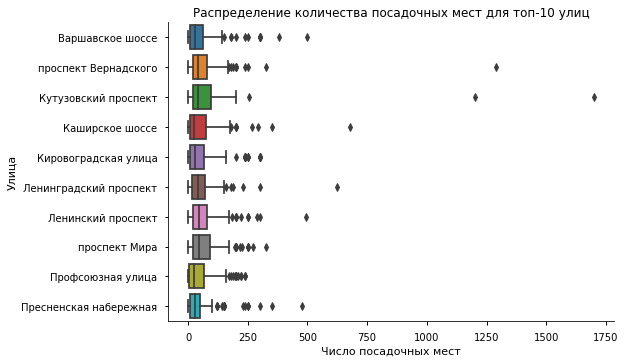

In [51]:
plt.plot()
sns.boxplot(x='number', y='street', data=data_top10)
plt.title('Распределение количества посадочных мест для топ-10 улиц')
plt.xlabel('Число посадочных мест')
plt.ylabel('Улица');

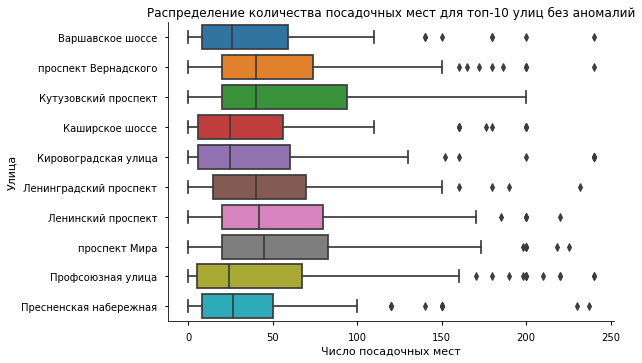

In [52]:
plt.plot()
sns.boxplot(x='number', y='street', data=data_top10[data_top10['number']<250])
plt.title('Распределение количества посадочных мест для топ-10 улиц без аномалий')
plt.xlabel('Число посадочных мест')
plt.ylabel('Улица');

Медианное количество посадочных мест для каждой из топ-10 улиц не превышает 50.  

<a id='step4'></a>
## 4. Общий вывод

* Кафе - самый распространенный тип объекта общественного питания в Москве. Рынок кафе перенасыщен, конкуренция высокая. Поэтому я бы рекомендовала выбрать другой вид заведения для реализации идеи. 
* Сетевых заведений в четыре раза меньше, чем несетевых. Сеть развить сложно, но в случае успеха это позволит нам повысить узнаваемость бренда и получать большие прибыли, поэтому будем ориентироваться на сетевое распространение.  
* В случае принятия решения о развитии сети наиболее предпочтительным будет выбор ресторана быстрого питания.  
* Для сетевых заведений характерно меньшее количество посадочных мест, чем для несетевых. 
* Самое большое количество посадочных мест в среднем предоставляют столовые и рестораны.   
* Среди топ-10 улиц по количеству объектов общественного питания выделяется Пресненская набережная, которая в отличие от других не имеет большой протяженности.
* Рекомендованное количество посадочных мест - около 50.  
* Что касается расположения, можно рекомендовать провести более детальный анализ: выбрать районы, содержащие топ-10 улиц и найти на них улицы, имеющие один объект общественного питания при отсутствии очевидных для этого причин (очень малая протяженность или расположение в промзоне например). По моему мнению, начать следует с Пресненского района. Идея с роботами там определенно должна иметь успех.


[К содержанию](#Содержание)

Презентация: https://yadi.sk/i/IMrfoGpadA_Rzg